<a href="https://colab.research.google.com/github/FatemehTahavori/CAPE/blob/master/convert_mask_binary_image_to_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

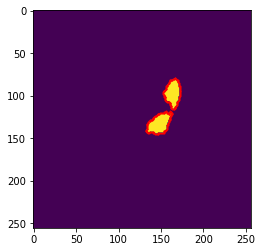

'{\n    "segmentation": [\n        [\n            165.0,\n            115.99803921568628,\n            164.0,\n            115.99803921568628,\n            163.0,\n            115.99803921568628,\n            162.00196078431372,\n            115.0,\n            162.00196078431372,\n            114.0,\n            162.00196078431372,\n            113.0,\n            162.00196078431372,\n            112.0,\n            162.0,\n            111.99803921568628,\n            161.00196078431372,\n            111.0,\n            161.00196078431372,\n            110.0,\n            161.0,\n            109.99803921568628,\n            160.00196078431372,\n            109.0,\n            160.00196078431372,\n            108.0,\n            160.0,\n            107.99803921568628,\n            159.00196078431372,\n            107.0,\n            159.0,\n            106.99803921568628,\n            158.0,\n            106.99803921568628,\n            157.0,\n            106.99803921568628,\n        

In [12]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure
import matplotlib.pyplot as plt
import datetime
import cv2  

now = datetime.datetime.now()


ground_truth_binary_mask = cv2.imread("/content/l (19).png", 0)
# plt.imshow(ground_truth_binary_mask)


fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)


ground_truth_area = mask.area(encoded_ground_truth)
ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
contours = measure.find_contours(ground_truth_binary_mask, 0.5)

# print(np.shape(contours))
# print(contours)

info = {
        "year": "2022",
        "version": "1",
        "description": "",
        "contributor": "",
        "url": "",
        "date_created": now.strftime("%Y-%m-%d %H:%M:%S")
    }
licenses = [
        {
            "id": 1,
            "url": "",
            "name": "Unknown"
        }
    ]


annotation = {
        "segmentation": [],
        "area": ground_truth_area.tolist(),
        "iscrowd": 0,
        "image_id": 123,
        "bbox": ground_truth_bounding_box.tolist(),
        "category_id": 1,
        "id": 1
    }

plt.imshow(ground_truth_binary_mask)
for contour in contours:
    contour = np.flip(contour, axis=1)
    plt.scatter(x=contour[:,0], y=contour[:,1], c='r', s=1)
    segmentation = contour.ravel().tolist()
    annotation["segmentation"].append(segmentation)
    
plt.show()
# print(json.dumps(annotation, indent=4))
json.dumps(annotation, indent=4)

In [33]:
import os
import glob
path = "/home/fatemeh/Desktop/pre_process_data/val/descending_aorta/*"

for file in glob.glob(path):
    names = str(file).split('/')[-1]
    folderName = os.path.basename(os.path.dirname(file))
    os.rename(file, f"{folderName} _ {names}")


A0_jpg.rf.85d6d50444ff5baea428fb3c275a9349.jpg
A21_jpg.rf.800306a22fbf1c02cbf117625980a74b.jpg
A12_jpg.rf.8deaf8a00dd0de4750cbfc09e60e0936.jpg


In [7]:
import json
import numpy as np


with open('/content/_annotations.coco.json') as json_file:
    data = json.load(json_file)
    print(data.keys())
    print(np.shape(data['categories']))
    # print(data['licenses'])
    print(len(data['annotations']))
    print(data['annotations'][26])

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
(27,)
68
{'id': 26, 'image_id': 25, 'category_id': 1, 'bbox': [59, 132, 265.156592, 167.71523399999998], 'area': 44470.79987392252, 'segmentation': [[289.859855, 171.399458, 282.378238, 156.383317, 274.166157, 143.455233, 261.61313, 137.767118, 249.63128, 137.660843, 238.347714, 140.444517, 229.244275, 137.024402, 218.580155, 132.315706, 208.67385, 134.811955, 199.850369, 139.407131, 187.895871, 141.039898, 176.869737, 136.394, 167.27235, 136.299802, 157.802071, 136.931412, 138.311252, 138.581086, 132.266426, 144.249879, 124.289253, 145.674927, 115.552655, 142.322441, 105.067128, 143.699182, 88.387144, 150.82563, 80.787678, 151.899528, 71.741483, 168.207743, 59.265066, 183.939098, 67.637909, 199.83716, 81.813572, 226.298648, 107.919214, 246.102426, 143.564609, 262.000489, 171.415327, 276.975045, 189.82148, 285.887274, 206.930282, 300.03094, 324.421658, 246.578733, 308.182577, 239.523998, 300.221493, 228.388093, 301.

SyntaxError: ignored

In [ ]:
import os

folder = '/media/sf_sharedFolder/cardiovascular_structures_segmentation_prepared/'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders)

In [39]:
import cv2
import os
import matplotlib.pyplot as plt
import datetime

folder = '/content/sample_data/images'
arr_images = os.listdir(folder)
now = datetime.datetime.now()


def images_dict(id, file_name):
     height, width = cv2.imread(os.path.join(folder, file_name)).shape[:2]
     d = dict();
     d['id'] = id
     d['license']   = 1
     d['file_name']   = file_name
     d['height'] = height 
     d['width'] = width
     d['date_captured']   = now.isoformat()

     return d


images = [images_dict(id, file_name) for id, file_name in enumerate(arr_images)]


# print(category_dict(0, "coronary_sinus"))
print(images)

[{'id': 0, 'license': 1, 'file_name': 'A0_jpg.rf.85d6d50444ff5baea428fb3c275a9349.jpg', 'height': 416, 'width': 416, 'date_captured': '2022-07-13T11:50:34.707596'}, {'id': 1, 'license': 1, 'file_name': 'A21_jpg.rf.800306a22fbf1c02cbf117625980a74b.jpg', 'height': 416, 'width': 416, 'date_captured': '2022-07-13T11:50:34.707596'}, {'id': 2, 'license': 1, 'file_name': 'A12_jpg.rf.8deaf8a00dd0de4750cbfc09e60e0936.jpg', 'height': 416, 'width': 416, 'date_captured': '2022-07-13T11:50:34.707596'}]


In [ ]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure
import matplotlib.pyplot as plt
import datetime
import cv2  


def images_dict(id, file_name):
     height, width = cv2.imread(os.path.join(folder, file_name)).shape[:2]
     d = dict();
     d['id'] = id
     d['license']   = 1
     d['file_name']   = file_name
     d['height'] = height 
     d['width'] = width
     d['date_captured']   = now.isoformat()

     return d

In [ ]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure
import matplotlib.pyplot as plt
import datetime
import cv2

folder = '/content/sample_data/images'
arr_images = os.listdir(folder)

def annotations_dict(id, file_name):

     ground_truth_binary_mask = cv2.imread(os.path.join(folder, file_name), 0)
     fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
     encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)


     ground_truth_area = mask.area(encoded_ground_truth)
     ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
     contours = measure.find_contours(ground_truth_binary_mask, 0.5)

     d = dict();
     d['id'] = id,
     d['image_id'] = id,
     d['category_id'] = ,
     d['bbox'] = ground_truth_bounding_box.tolist(),
     d['area'] = ground_truth_area.tolist(),
     d['segmentation'] = [],
     d['iscrowd'] = 0,

     for contour in contours:
       contour = np.flip(contour, axis=1)
       plt.scatter(x=contour[:,0], y=contour[:,1], c='r', s=1)
       segmentation = contour.ravel().tolist()
       d['segmentation'].append(segmentation)

     return d

annotations = [annotations_dict(id, name) for id, name in enumerate(names)]

print(categories)
